In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report

In [7]:
df = pd.read_csv('./dataset/winequality-red.csv')

In [8]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [13]:
def plot_against_quality(param):
    return sns.barplot(x='quality', y=param, data=df)

In [15]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

/home/aero/study/dmw_project/data-mining/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


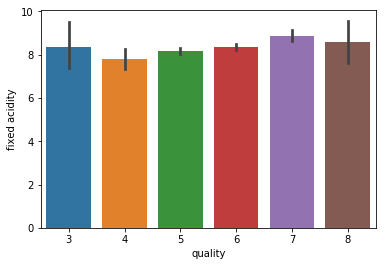

In [16]:
plot_against_quality('fixed acidity')

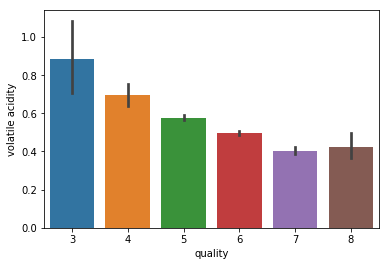

In [17]:
plot_against_quality('volatile acidity')

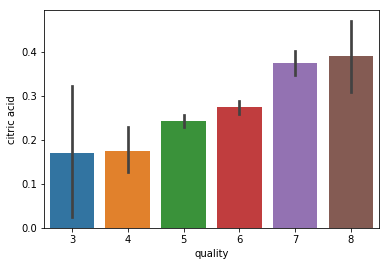

In [18]:
plot_against_quality('citric acid')

In [19]:
plot_against_quality('residual sugar')

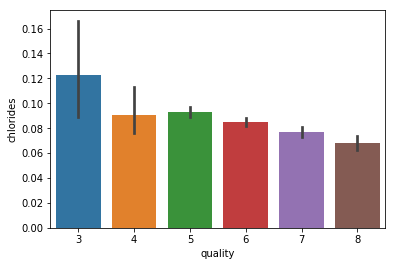

In [20]:
plot_against_quality('chlorides')

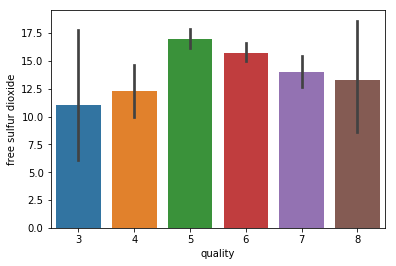

In [21]:
plot_against_quality('free sulfur dioxide')

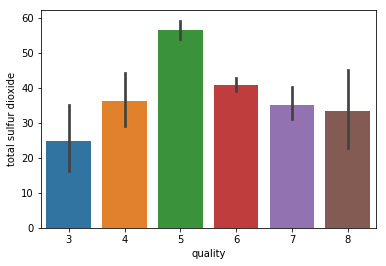

In [22]:
plot_against_quality('total sulfur dioxide')

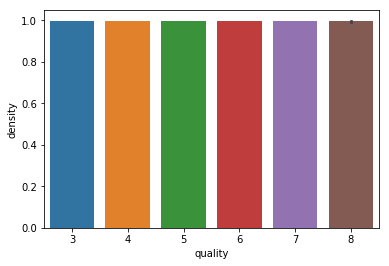

In [23]:
plot_against_quality('density')

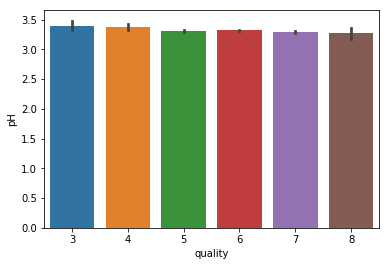

In [24]:
plot_against_quality('pH')

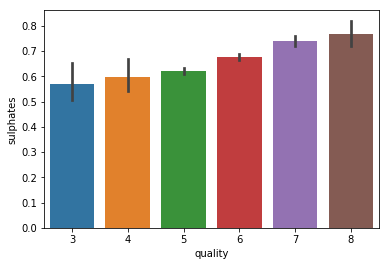

In [25]:
plot_against_quality('sulphates')

In [26]:
plot_against_quality('alcohol')

### Dropping density and pH columns as they have little to no effect to the quality

In [28]:
df = df.drop(['density', 'pH'], axis=1)

In [32]:
x = df.drop('quality', axis=1)
y = df['quality']

In [40]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=3)

# Classifier 1: Naive Bayes Multinomial Classifier

In [41]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [42]:
mnb.fit(train_x, train_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [43]:
mnb_y = mnb.predict(test_x)

In [45]:
print(classification_report(test_y, mnb_y))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        14
           5       0.57      0.49      0.53       166
           6       0.48      0.45      0.47       166
           7       0.18      0.40      0.25        48
           8       0.00      0.00      0.00         3

   micro avg       0.44      0.44      0.44       400
   macro avg       0.21      0.22      0.21       400
weighted avg       0.46      0.44      0.44       400



/home/aero/study/dmw_project/data-mining/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Classifier 2: Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [47]:
dtc.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [48]:
dtc_y = dtc.predict(test_x)

In [49]:
print(classification_report(test_y, dtc_y))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.09      0.07      0.08        14
           5       0.71      0.74      0.72       166
           6       0.69      0.62      0.65       166
           7       0.52      0.60      0.56        48
           8       0.12      0.33      0.18         3

   micro avg       0.64      0.64      0.64       400
   macro avg       0.36      0.40      0.37       400
weighted avg       0.65      0.64      0.64       400



# Classifier 3: Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [52]:
rfc.fit(train_x, train_y)

/home/aero/study/dmw_project/data-mining/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:
rfc_y = rfc.predict(test_x)

In [54]:
print(classification_report(test_y, rfc_y))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        14
           5       0.68      0.81      0.74       166
           6       0.66      0.67      0.67       166
           7       0.73      0.46      0.56        48
           8       0.00      0.00      0.00         3

   micro avg       0.67      0.67      0.67       400
   macro avg       0.35      0.32      0.33       400
weighted avg       0.65      0.67      0.65       400

